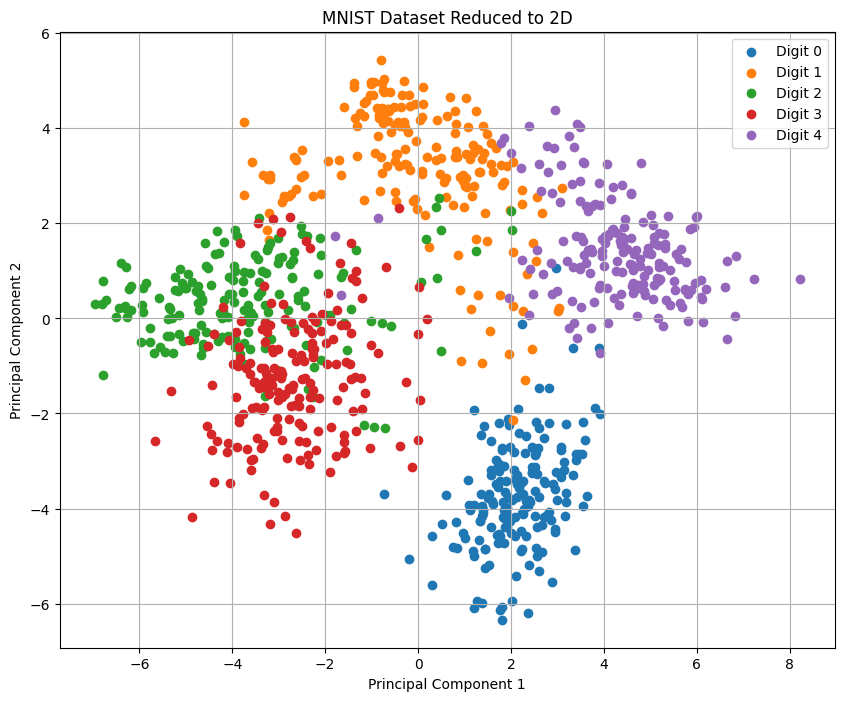

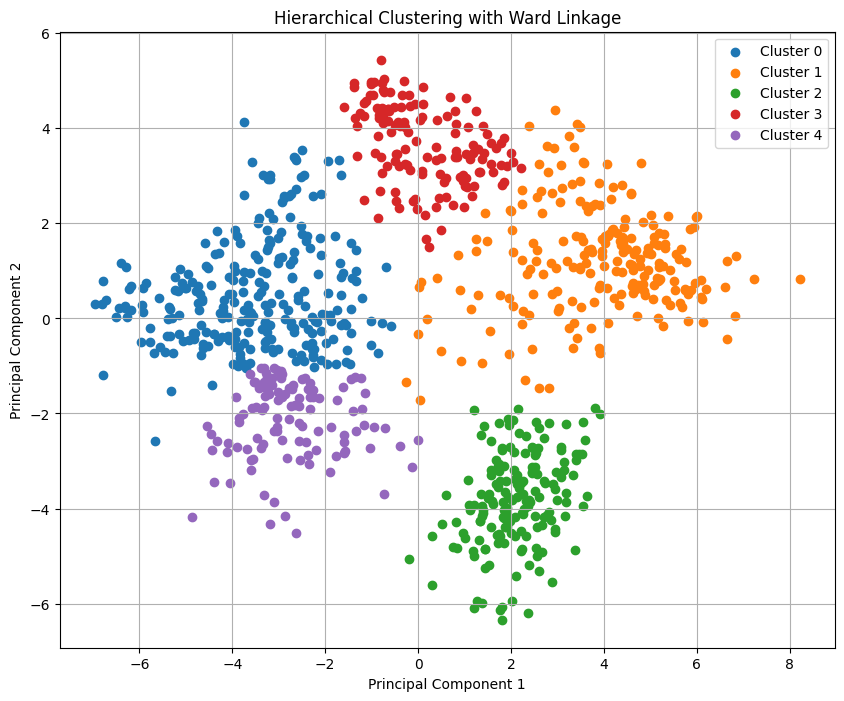

Purity Score for Ward Linkage: 0.8147


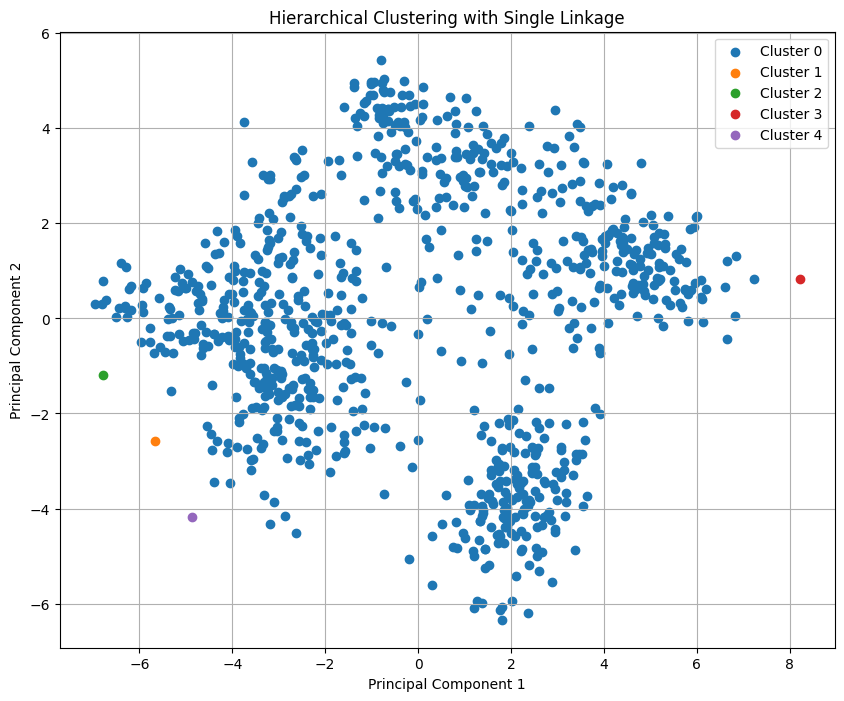

Purity Score for Single Linkage: 0.2064


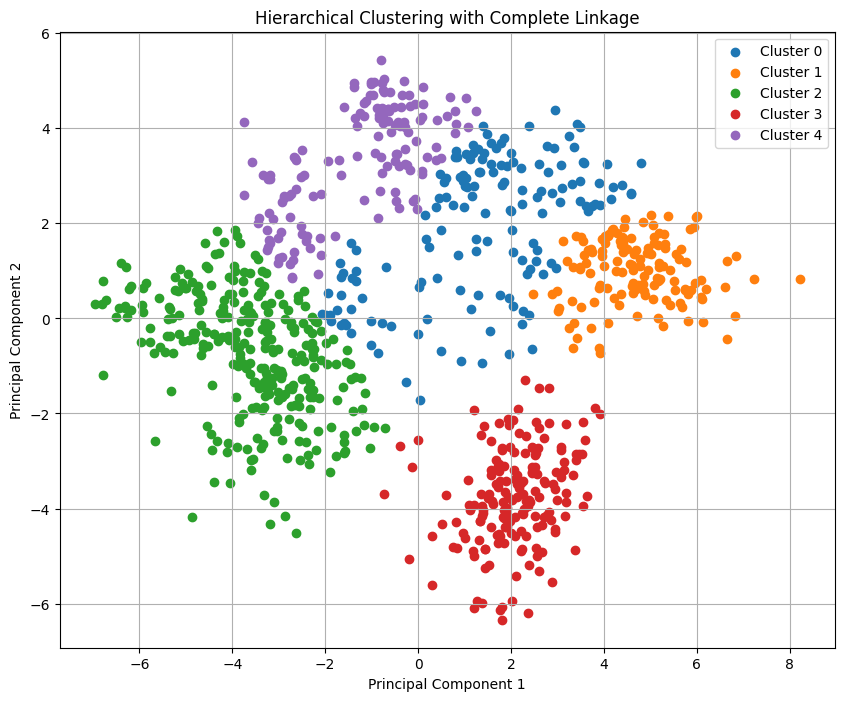

Purity Score for Complete Linkage: 0.7092


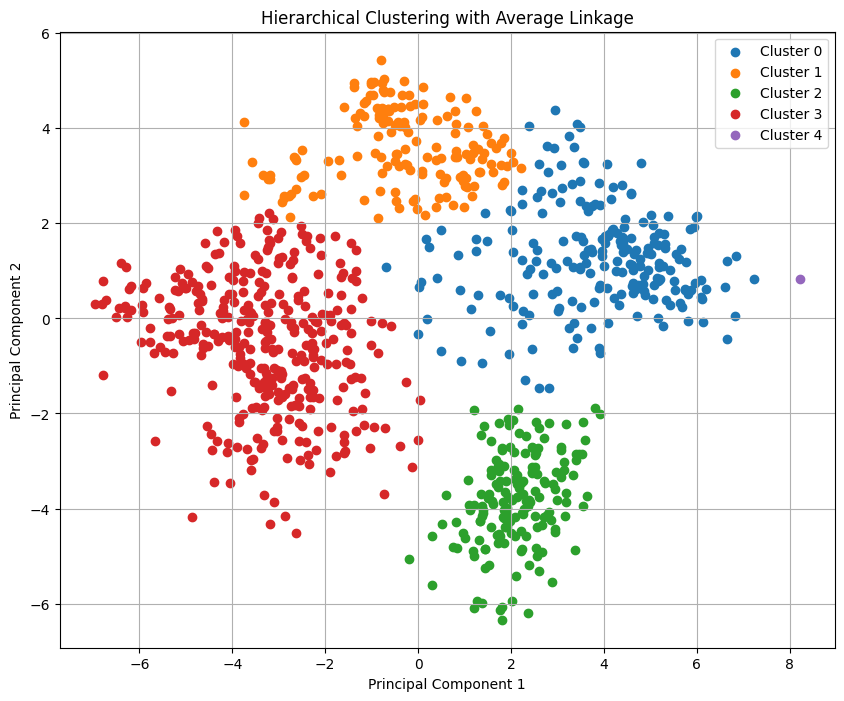

Purity Score for Average Linkage: 0.7447


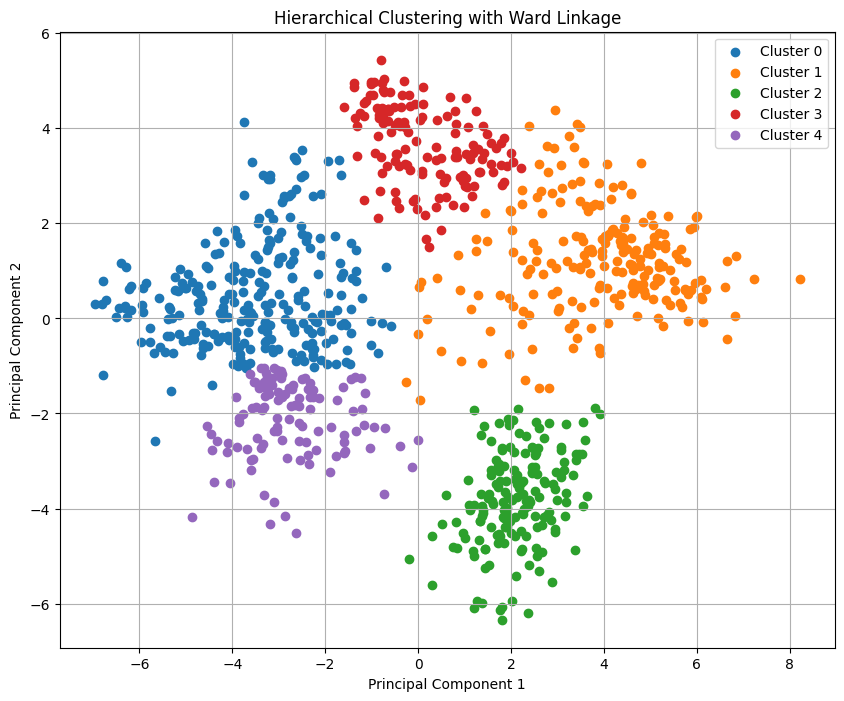

Purity Score for Ward Linkage: 0.8147
Best linkage method: ward with purity score: 0.8147


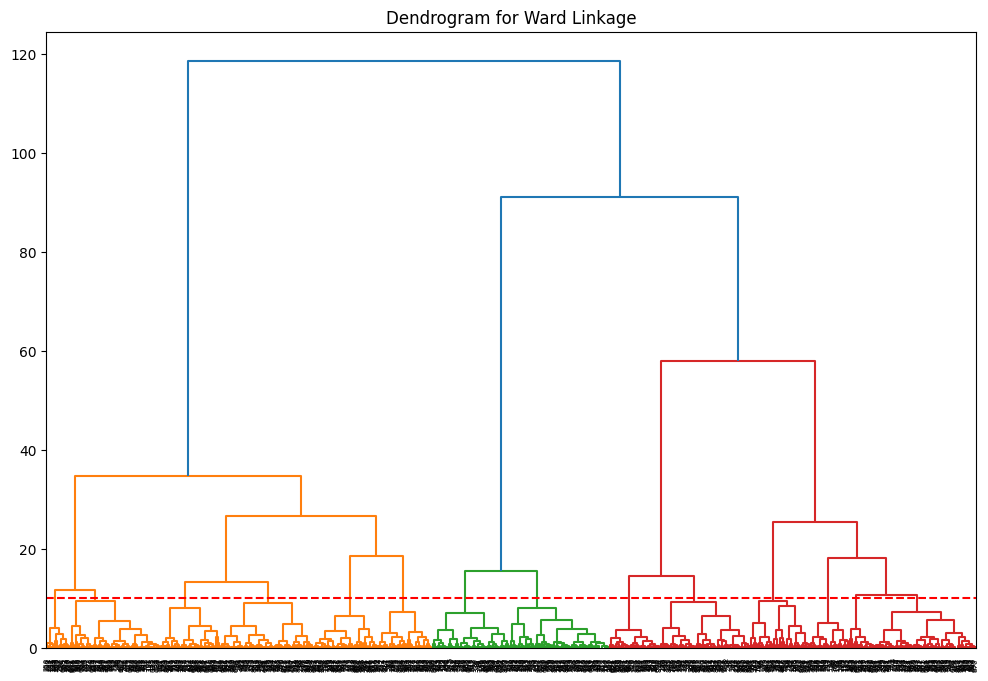

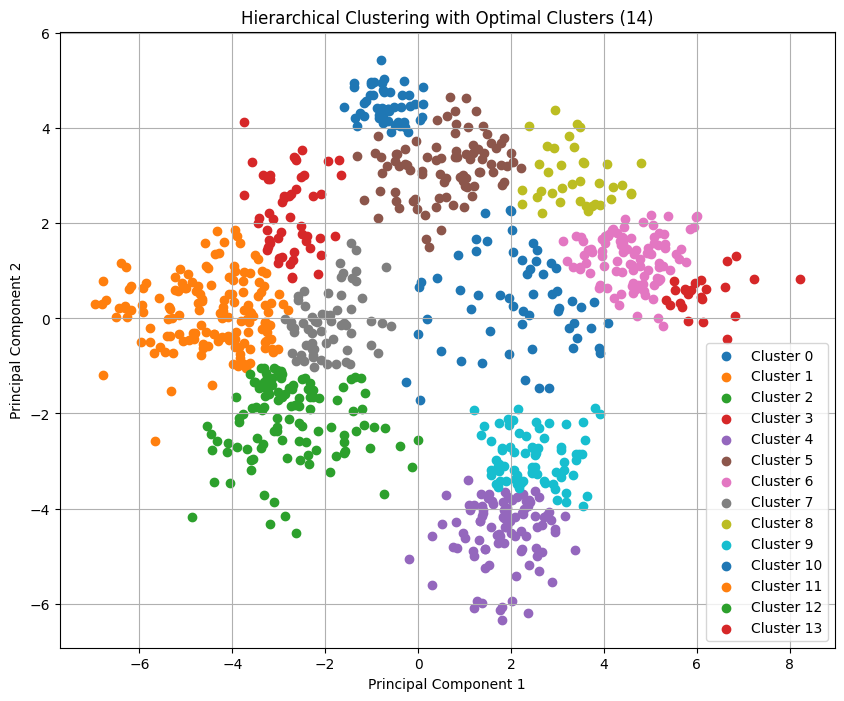

Cluster 0: Most frequent digit is 1
Cluster 1: Most frequent digit is 2
Cluster 2: Most frequent digit is 3
Cluster 3: Most frequent digit is 1
Cluster 4: Most frequent digit is 0
Cluster 5: Most frequent digit is 1
Cluster 6: Most frequent digit is 4
Cluster 7: Most frequent digit is 3
Cluster 8: Most frequent digit is 4
Cluster 9: Most frequent digit is 0
Cluster 10: Most frequent digit is 1
Cluster 11: Most frequent digit is 2
Cluster 12: Most frequent digit is 3
Cluster 13: Most frequent digit is 4


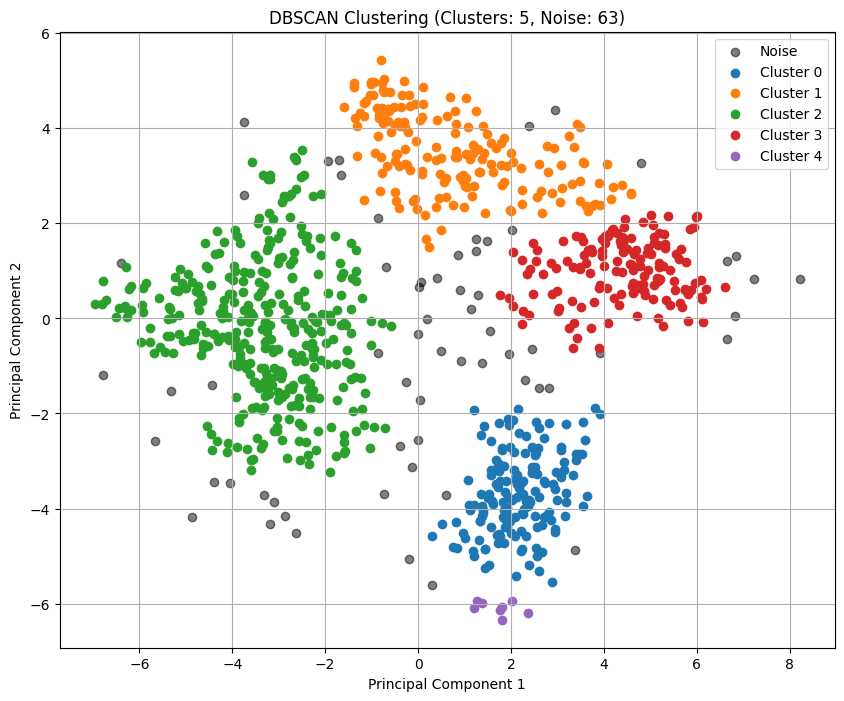

DBSCAN Purity Score (excluding noise): 0.7160


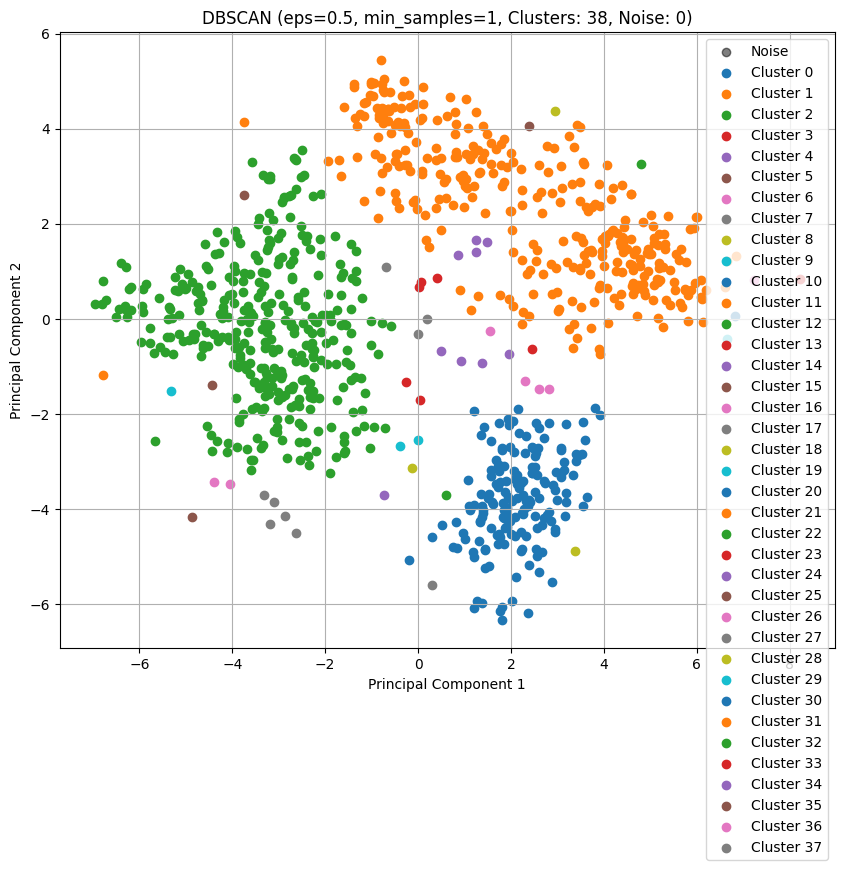

DBSCAN Purity (eps=0.5, min_samples=1): 0.6115
  Cluster 0: Most frequent digit is 0
  Cluster 1: Most frequent digit is 4
  Cluster 2: Most frequent digit is 2
  Cluster 3: Most frequent digit is 2
  Cluster 4: Most frequent digit is 1
  Cluster 5: Most frequent digit is 4
  Cluster 6: Most frequent digit is 0
  Cluster 7: Most frequent digit is 3
  Cluster 8: Most frequent digit is 4
  Cluster 9: Most frequent digit is 3
  Cluster 10: Most frequent digit is 0
  Cluster 11: Most frequent digit is 1
  Cluster 12: Most frequent digit is 4
  Cluster 13: Most frequent digit is 3
  Cluster 14: Most frequent digit is 1
  Cluster 15: Most frequent digit is 1
  Cluster 16: Most frequent digit is 4
  Cluster 17: Most frequent digit is 0
  Cluster 18: Most frequent digit is 3
  Cluster 19: Most frequent digit is 4
  Cluster 20: Most frequent digit is 0
  Cluster 21: Most frequent digit is 4
  Cluster 22: Most frequent digit is 0
  Cluster 23: Most frequent digit is 4
  Cluster 24: Most frequent

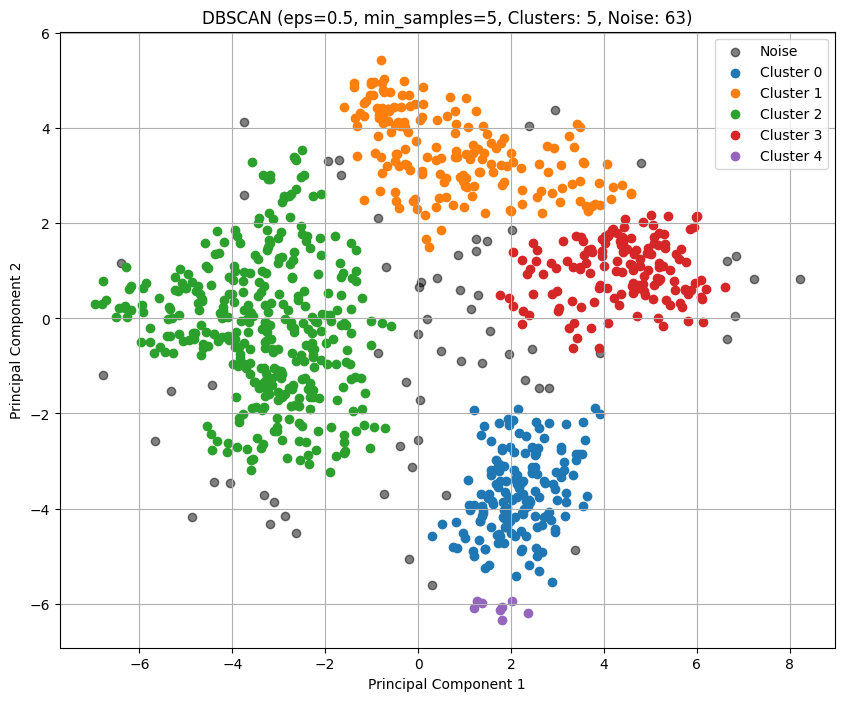

DBSCAN Purity (eps=0.5, min_samples=5): 0.7160
  Cluster 0: Most frequent digit is 0
  Cluster 1: Most frequent digit is 1
  Cluster 2: Most frequent digit is 2
  Cluster 3: Most frequent digit is 4
  Cluster 4: Most frequent digit is 0


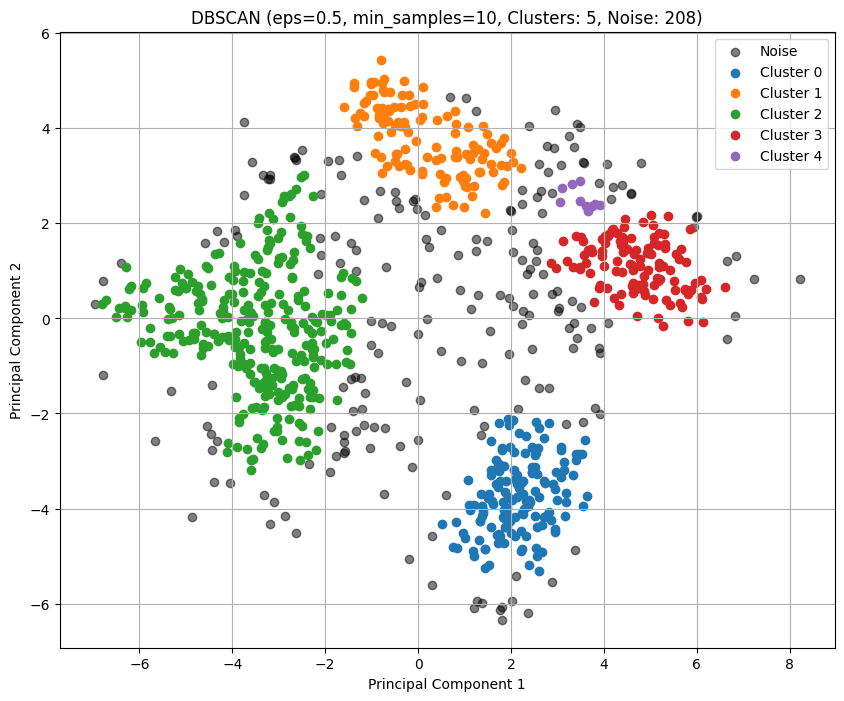

DBSCAN Purity (eps=0.5, min_samples=10): 0.7720
  Cluster 0: Most frequent digit is 0
  Cluster 1: Most frequent digit is 1
  Cluster 2: Most frequent digit is 2
  Cluster 3: Most frequent digit is 4
  Cluster 4: Most frequent digit is 4


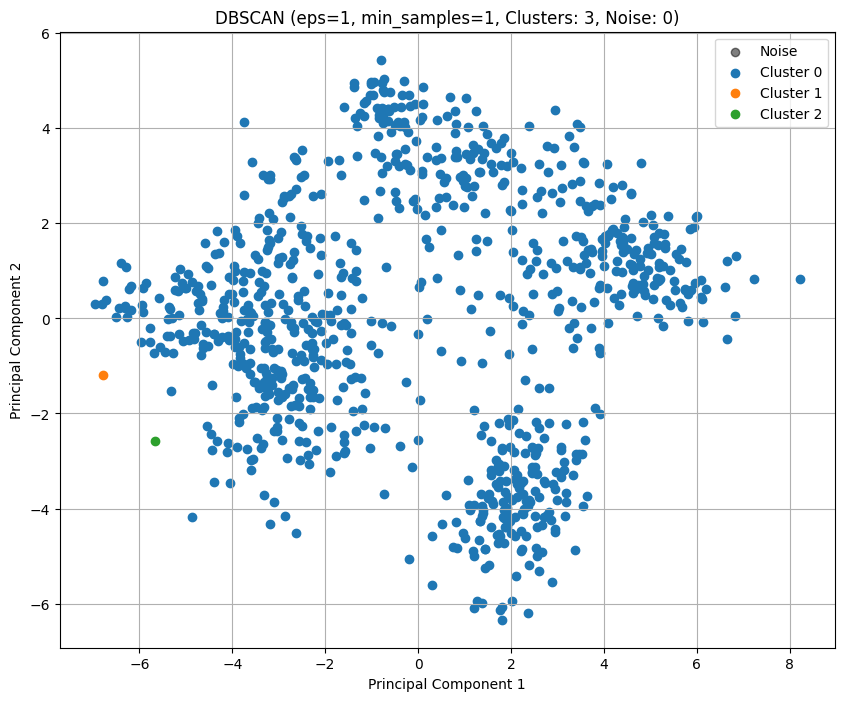

DBSCAN Purity (eps=1, min_samples=1): 0.2042
  Cluster 0: Most frequent digit is 1
  Cluster 1: Most frequent digit is 2
  Cluster 2: Most frequent digit is 3


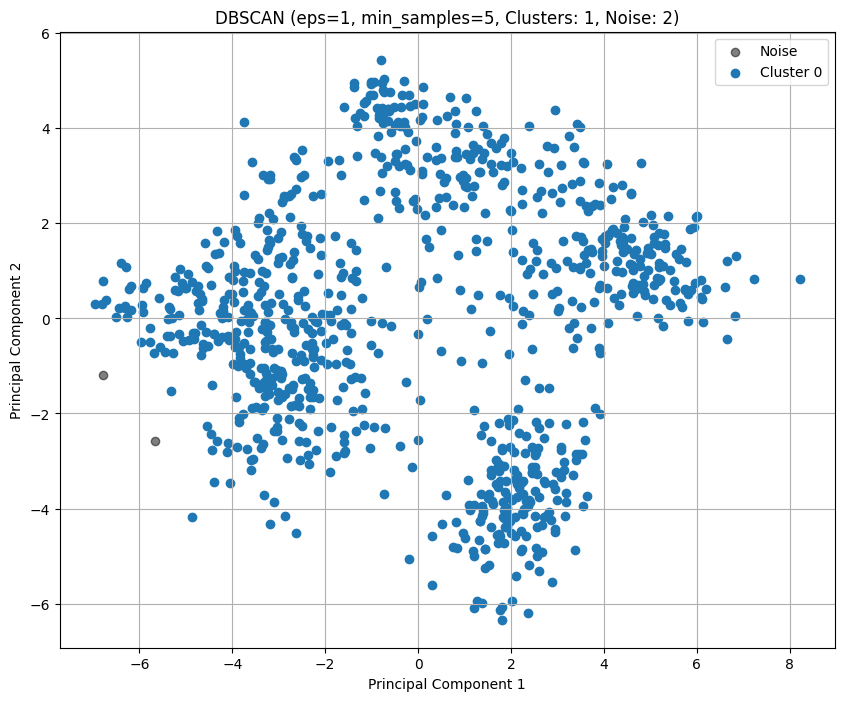

DBSCAN Purity (eps=1, min_samples=5): 0.2024
  Cluster 0: Most frequent digit is 1


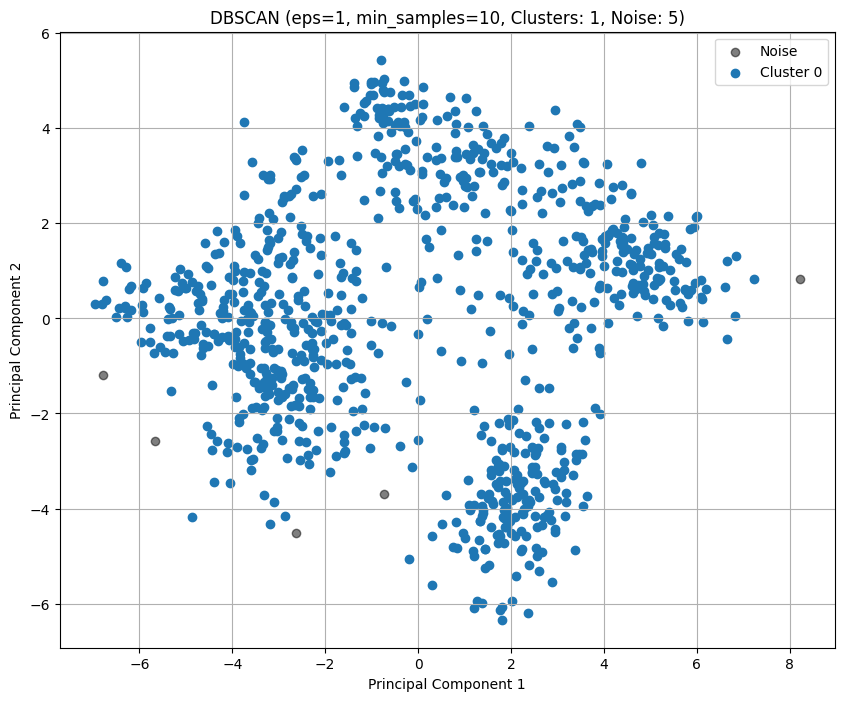

DBSCAN Purity (eps=1, min_samples=10): 0.2031
  Cluster 0: Most frequent digit is 1


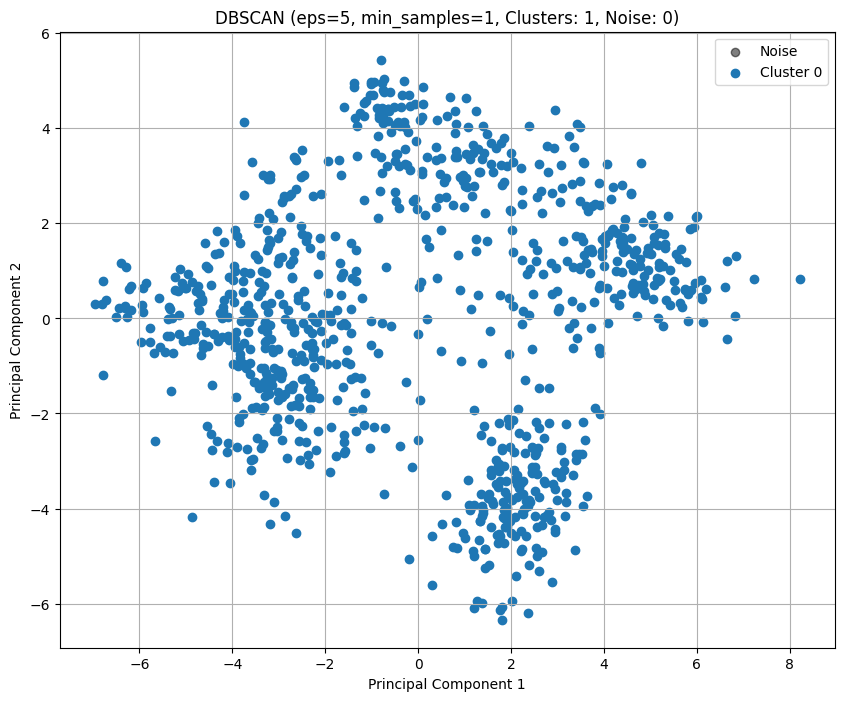

DBSCAN Purity (eps=5, min_samples=1): 0.2031
  Cluster 0: Most frequent digit is 3


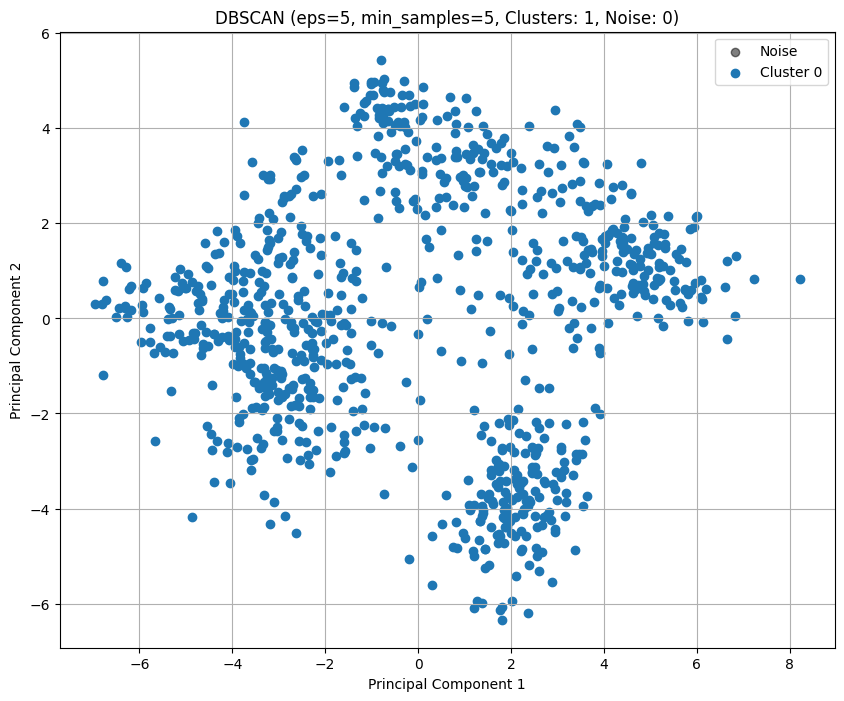

DBSCAN Purity (eps=5, min_samples=5): 0.2031
  Cluster 0: Most frequent digit is 3


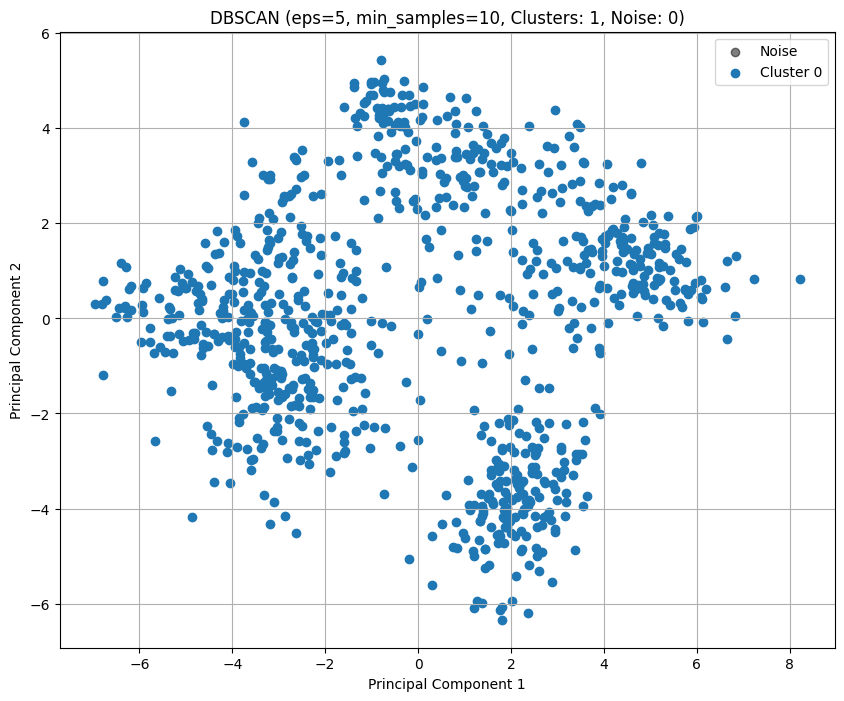

DBSCAN Purity (eps=5, min_samples=10): 0.2031
  Cluster 0: Most frequent digit is 3
Best DBSCAN parameters: eps=0.5, min_samples=10 with purity: 0.7720


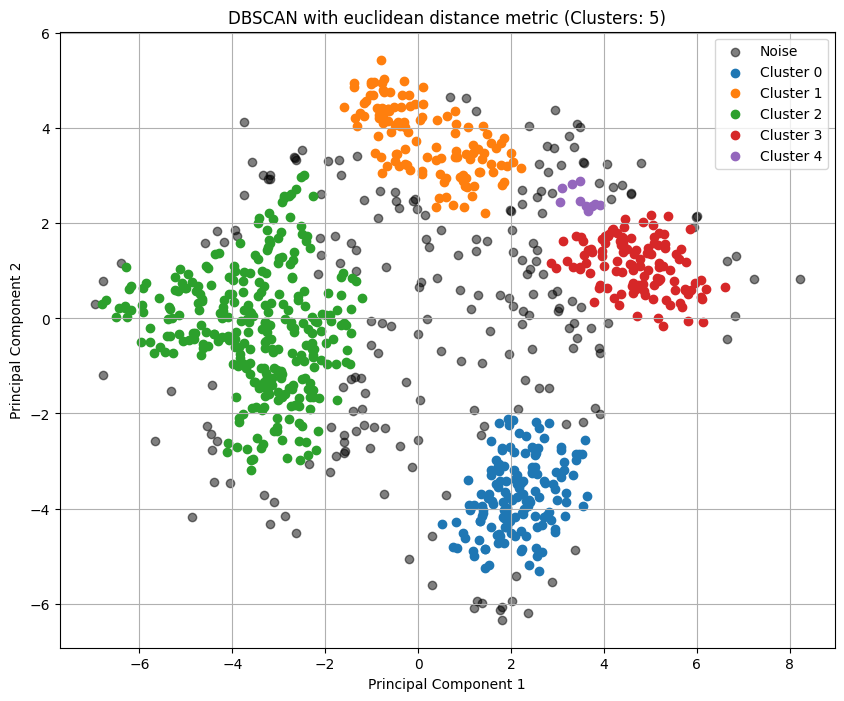

DBSCAN Purity with euclidean metric: 0.7720


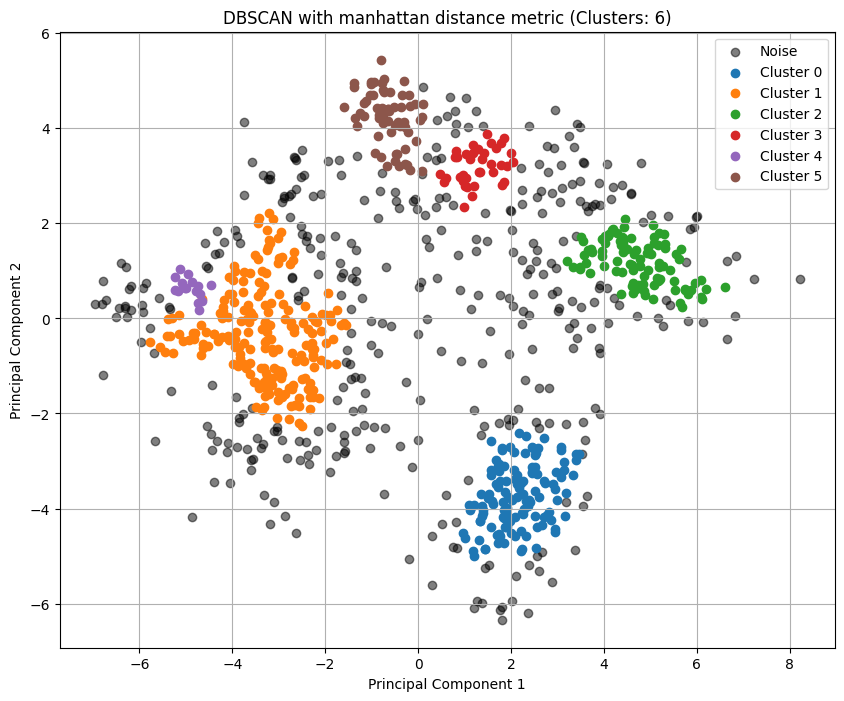

DBSCAN Purity with manhattan metric: 0.8109


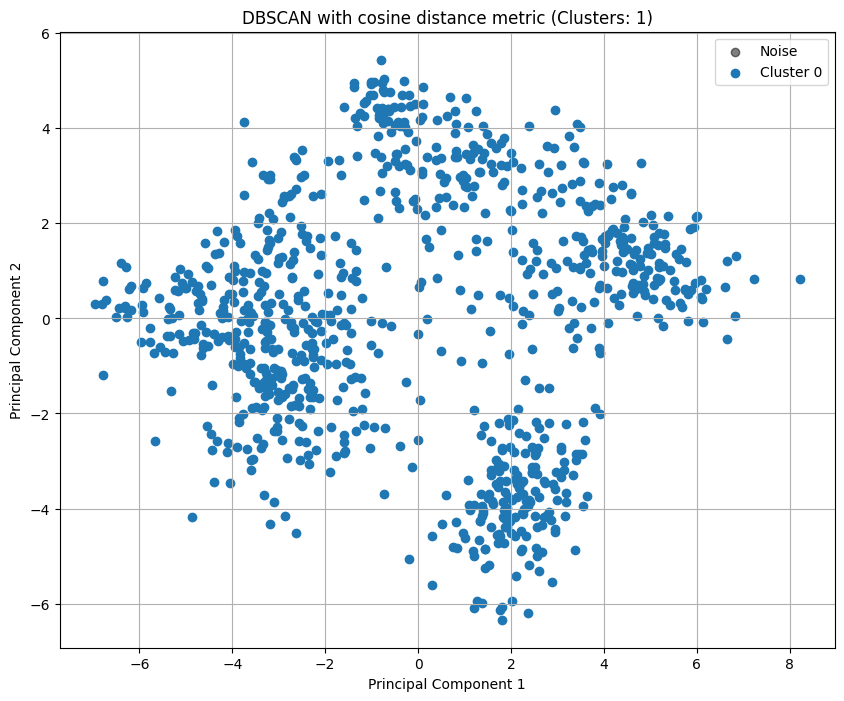

DBSCAN Purity with cosine metric: 0.2031


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

# Load MNIST subset
mnist = load_digits()
data = mnist.data
labels = mnist.target

# Filter for digits 0-4
filtered_indices = np.where(labels < 5)
data = data[filtered_indices]
labels = labels[filtered_indices]

# Normalize the dataset
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
data_2D = pca.fit_transform(data_normalized)

# Create DataFrame for the reduced data
mnist_dataset_2D = pd.DataFrame(data_2D, columns=['PC1', 'PC2'])
mnist_dataset_2D['label'] = labels

# Visualize the reduced data colored by actual digits
plt.figure(figsize=(10, 8))
for digit in range(5):
    subset = mnist_dataset_2D[mnist_dataset_2D['label'] == digit]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Digit {digit}')
plt.title('MNIST Dataset Reduced to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Extract features and labels
X = mnist_dataset_2D[['PC1', 'PC2']].values
y_true = mnist_dataset_2D['label'].values

# Define purity score function
def purity_score(y_true, y_pred):
    contingency_matrix = pd.crosstab(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix.values, axis=0)) / np.sum(contingency_matrix.values)

# Part 2: Hierarchical Clustering
# Apply Agglomerative Hierarchical Clustering with n_clusters=5 and linkage='ward'
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster in range(5):
    subset = X[cluster_labels == cluster]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster}')
plt.title('Hierarchical Clustering with Ward Linkage')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Calculate purity score
ward_purity = purity_score(y_true, cluster_labels)
print(f'Purity Score for Ward Linkage: {ward_purity:.4f}')

# Try different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
purity_scores = {}

for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = clustering.fit_predict(X)
    
    plt.figure(figsize=(10, 8))
    for cluster in range(5):
        subset = X[labels == cluster]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster}')
    plt.title(f'Hierarchical Clustering with {method.capitalize()} Linkage')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    method_purity = purity_score(y_true, labels)
    purity_scores[method] = method_purity
    print(f'Purity Score for {method.capitalize()} Linkage: {method_purity:.4f}')

# Find best linkage method
best_linkage = max(purity_scores, key=purity_scores.get)
print(f'Best linkage method: {best_linkage} with purity score: {purity_scores[best_linkage]:.4f}')

# Generate dendrogram
plt.figure(figsize=(12, 8))
linked = linkage(X, method='ward')
dendrogram(linked)
plt.title('Dendrogram for Ward Linkage')
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

# Apply clustering with optimal number of clusters from dendrogram (using threshold=10)
optimal_clustering = AgglomerativeClustering(n_clusters=None, linkage=best_linkage, distance_threshold=10)
optimal_labels = optimal_clustering.fit_predict(X)
n_clusters = len(np.unique(optimal_labels))

plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    subset = X[optimal_labels == cluster]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster}')
plt.title(f'Hierarchical Clustering with Optimal Clusters ({n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Find most frequent digit in each cluster
for cluster in range(n_clusters):
    cluster_indices = np.where(optimal_labels == cluster)[0]
    cluster_digits = y_true[cluster_indices]
    digit_counts = np.bincount(cluster_digits)
    most_frequent = np.argmax(digit_counts)
    print(f'Cluster {cluster}: Most frequent digit is {most_frequent}')

# Part 3: DBSCAN Clustering
# Apply DBSCAN with default parameters
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X)
n_clusters_dbscan = len(np.unique(dbscan_labels[dbscan_labels >= 0]))
n_noise = np.sum(dbscan_labels == -1)

plt.figure(figsize=(10, 8))
# Plot noise points
noise = X[dbscan_labels == -1]
plt.scatter(noise[:, 0], noise[:, 1], color='black', label='Noise', alpha=0.5)

# Plot clusters
for cluster in range(n_clusters_dbscan):
    subset = X[dbscan_labels == cluster]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster}')
    
plt.title(f'DBSCAN Clustering (Clusters: {n_clusters_dbscan}, Noise: {n_noise})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Calculate purity score for DBSCAN (excluding noise points)
valid_indices = dbscan_labels != -1
if np.any(valid_indices):
    dbscan_purity = purity_score(y_true[valid_indices], dbscan_labels[valid_indices])
    print(f'DBSCAN Purity Score (excluding noise): {dbscan_purity:.4f}')

# Try different eps and min_samples values
eps_values = [0.5, 1, 5]
min_samples_values = [1, 5, 10]
dbscan_results = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters = len(np.unique(labels[labels >= 0]))
        n_noise = np.sum(labels == -1)
        
        plt.figure(figsize=(10, 8))
        # Plot noise points
        noise = X[labels == -1]
        plt.scatter(noise[:, 0], noise[:, 1], color='black', label='Noise', alpha=0.5)
        
        # Plot clusters
        for cluster in range(n_clusters):
            subset = X[labels == cluster]
            plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster}')
            
        plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples}, Clusters: {n_clusters}, Noise: {n_noise})')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Calculate purity score (excluding noise points)
        valid_indices = labels != -1
        if np.any(valid_indices):
            params_purity = purity_score(y_true[valid_indices], labels[valid_indices])
            dbscan_results[(eps, min_samples)] = params_purity
            print(f'DBSCAN Purity (eps={eps}, min_samples={min_samples}): {params_purity:.4f}')
            
            # Find most frequent digit in each cluster
            for cluster in range(n_clusters):
                cluster_indices = np.where(labels == cluster)[0]
                cluster_digits = y_true[cluster_indices]
                digit_counts = np.bincount(cluster_digits)
                most_frequent = np.argmax(digit_counts)
                print(f'  Cluster {cluster}: Most frequent digit is {most_frequent}')

# Find best DBSCAN parameters
if dbscan_results:
    best_params = max(dbscan_results, key=dbscan_results.get)
    print(f'Best DBSCAN parameters: eps={best_params[0]}, min_samples={best_params[1]} with purity: {dbscan_results[best_params]:.4f}')

# Compare different distance metrics for DBSCAN
metrics = ['euclidean', 'manhattan', 'cosine']
best_eps, best_min_samples = best_params if dbscan_results else (0.5, 5)

for metric in metrics:
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples, metric=metric)
    labels = dbscan.fit_predict(X)
    n_clusters = len(np.unique(labels[labels >= 0]))
    
    plt.figure(figsize=(10, 8))
    # Plot noise points
    noise = X[labels == -1]
    plt.scatter(noise[:, 0], noise[:, 1], color='black', label='Noise', alpha=0.5)
    
    # Plot clusters
    for cluster in range(n_clusters):
        subset = X[labels == cluster]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster}')
        
    plt.title(f'DBSCAN with {metric} distance metric (Clusters: {n_clusters})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate purity score (excluding noise points)
    valid_indices = labels != -1
    if np.any(valid_indices):
        metric_purity = purity_score(y_true[valid_indices], labels[valid_indices])
        print(f'DBSCAN Purity with {metric} metric: {metric_purity:.4f}')
